In [2]:
import pandas as pd
import seaborn as sns
import folium
import glob

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
# 1. CSV 파일 목록 가져오기
file_list = glob.glob('../data/bike_rent_*.csv')
file_list.sort()  # 숫자 순서대로 정렬

print(f"총 {len(file_list)}개 파일을 찾았습니다.")
print("파일 목록:", file_list)

# 2. 각 파일 읽기 (한글 인코딩 처리 + 날짜 컬럼 변환)
df_list = [pd.read_csv(f, encoding='utf-8', parse_dates=['대여일시']) for f in file_list]

# 3. 병합 및 중복 제거
if df_list:
    df_all = pd.concat(df_list, ignore_index=True)
    print(f"병합된 총 행 수 (중복 제거 전): {df_all.shape[0]}")

    df_all.drop_duplicates(inplace=True)
    print(f"중복 제거 후 총 행 수: {df_all.shape[0]}")

    # 4. CSV 저장 (Excel 호환 인코딩)
    df_all.to_csv('bike_rent_combined.csv', index=False, encoding='utf-8-sig')
    print("CSV 파일로 저장 완료: bike_rent_combined.csv")

    # 5. 확인용 출력
    print(df_all.head())
else:
    print("CSV 파일을 찾을 수 없습니다.")

총 6개 파일을 찾았습니다.
파일 목록: ['../data\\bike_rent_1.csv', '../data\\bike_rent_2.csv', '../data\\bike_rent_3.csv', '../data\\bike_rent_4.csv', '../data\\bike_rent_5.csv', '../data\\bike_rent_6.csv']
병합된 총 행 수 (중복 제거 전): 2215632
중복 제거 후 총 행 수: 2215583
CSV 파일로 저장 완료: bike_rent_combined.csv
       자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930
3  SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6  1340
4  SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5  1230


In [4]:
bikes = df_all
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215583 entries, 0 to 2215631
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   이용시간      int64         
 5   이용거리      int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 118.3+ MB


In [5]:
bikes.describe()

대여일시      대여 대여소번호          이용시간          이용거리
count                        2215583  2.215583e+06  2.215583e+06  2.215583e+06
mean   2019-06-16 08:40:07.242464768  1.226148e+03  2.716996e+01  3.912936e+03
min              2019-06-01 00:00:00  3.000000e+00  1.000000e+00  0.000000e+00
25%              2019-06-08 22:04:00  5.050000e+02  8.000000e+00  1.220000e+03
50%              2019-06-16 15:14:00  1.159000e+03  1.700000e+01  2.270000e+03
75%              2019-06-23 20:22:00  1.846000e+03  3.700000e+01  4.670000e+03
max              2019-06-30 23:59:00  9.998000e+03  3.133000e+03  2.323100e+05
std                              NaN  8.499153e+02  2.908103e+01  5.145499e+03

In [6]:
bikes.describe( include=[ 'object', 'datetime64' ] )

자전거번호                           대여일시        대여 대여소명
count     2215583                        2215583        2215583
unique      19029                            NaN           1543
top     SPB-17237                            NaN  뚝섬유원지역 1번출구 앞
freq          292                            NaN          12617
mean          NaN  2019-06-16 08:40:07.242464768            NaN
min           NaN            2019-06-01 00:00:00            NaN
25%           NaN            2019-06-08 22:04:00            NaN
50%           NaN            2019-06-16 15:14:00            NaN
75%           NaN            2019-06-23 20:22:00            NaN
max           NaN            2019-06-30 23:59:00            NaN

In [7]:
bikes.isnull()

자전거번호   대여일시  대여 대여소번호  대여 대여소명   이용시간   이용거리
0        False  False     False    False  False  False
1        False  False     False    False  False  False
2        False  False     False    False  False  False
3        False  False     False    False  False  False
4        False  False     False    False  False  False
...        ...    ...       ...      ...    ...    ...
2215627  False  False     False    False  False  False
2215628  False  False     False    False  False  False
2215629  False  False     False    False  False  False
2215630  False  False     False    False  False  False
2215631  False  False     False    False  False  False

[2215583 rows x 6 columns]

In [8]:
bikes.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
이용시간        0
이용거리        0
dtype: int64

In [9]:
bikes.head()

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930
3  SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6  1340
4  SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5  1230

In [10]:
# 한글 요일 리스트
요일 = ['월', '화', '수', '목', '금', '토', '일']

# 날짜만 추출
bikes['일자'] = bikes['대여일시'].dt.day

# 요일 번호 (0=월 ~ 6=일)
bikes['요일번호'] = bikes['대여일시'].dt.dayofweek

# 요일 한글 이름
bikes['요일'] = bikes['요일번호'].apply(lambda x: 요일[x])

# 대여 시각 (0~23시)
bikes['대여시간대'] = bikes['대여일시'].dt.hour

# 주말 여부 (토/일이면 '주말', 그 외는 '평일')
bikes['주말구분'] = bikes['요일번호'].apply(lambda x: '주말' if x >= 5 else '평일')

print(bikes[['대여일시', '일자', '요일번호', '요일', '대여시간대', '주말구분']].head(10))

                 대여일시  일자  요일번호 요일  대여시간대 주말구분
0 2019-06-03 08:49:00   3     0  월      8   평일
1 2019-06-03 08:33:00   3     0  월      8   평일
2 2019-06-05 08:27:00   5     2  수      8   평일
3 2019-06-05 08:46:00   5     2  수      8   평일
4 2019-06-10 08:27:00  10     0  월      8   평일
5 2019-06-11 08:29:00  11     1  화      8   평일
6 2019-06-12 08:29:00  12     2  수      8   평일
7 2019-06-17 08:34:00  17     0  월      8   평일
8 2019-06-17 08:47:00  17     0  월      8   평일
9 2019-06-18 08:36:00  18     1  화      8   평일


In [11]:
bikes.info()
print(bikes['요일'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 2215583 entries, 0 to 2215631
Data columns (total 11 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   이용시간      int64         
 5   이용거리      int64         
 6   일자        int32         
 7   요일번호      int32         
 8   요일        object        
 9   대여시간대     int32         
 10  주말구분      object        
dtypes: datetime64[ns](1), int32(3), int64(3), object(4)
memory usage: 177.5+ MB
요일
토    375943
일    361090
수    314982
월    310521
화    289531
금    287907
목    275609
Name: count, dtype: int64


In [12]:
bike_shop = pd.read_excel('../data/bike_rent_location.xlsx')
bike_shop.info()
bike_shop.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      1537 non-null   object 
 1   대여소번호   1537 non-null   int64  
 2   대여소명    1537 non-null   object 
 3   위도      1537 non-null   float64
 4   경도      1537 non-null   float64
 5   거치대수    1537 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 72.2+ KB


구분  대여소번호              대여소명         위도          경도  거치대수
0  마포구    101  101. (구)합정동 주민센터  37.549561  126.905754     5
1  마포구    102   102. 망원역 1번출구 앞  37.556000  126.910454    20
2  마포구    103   103. 망원역 2번출구 앞  37.554951  126.910835    14
3  마포구    104   104. 합정역 1번출구 앞  37.550629  126.914986    13
4  마포구    105   105. 합정역 5번출구 앞  37.550007  126.914825     5

In [13]:
bike_gu = bike_shop[['구분', '대여소번호', '대여소명', '위도', '경도']]
bike_gu.head(1)

구분  대여소번호              대여소명         위도          경도
0  마포구    101  101. (구)합정동 주민센터  37.549561  126.905754

In [14]:
bikes = pd.merge(bikes, bike_gu, left_on='대여 대여소번호', right_on='대여소번호')
bikes.head(3)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930   5   

   요일번호 요일  대여시간대 주말구분    구분  대여소번호                    대여소명         위도  \
0     0  월      8   평일  동대문구    646  646. 장한평역 1번출구 (국민은행앞)  37.561867   
1     0  월      8   평일   성동구    526           526. 용답토속공원 앞  37.563511   
2     2  수      8   평일  동대문구    646  646. 장한평역 1번출구 (국민은행앞)  37.561867   

           경도  
0  127.064377  
1  127.056725  
2  127.064377

In [15]:
bikes.drop(['대여소번호', '대여소명'], axis=1, inplace=True)
bikes.head(3)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930   5   

   요일번호 요일  대여시간대 주말구분    구분         위도          경도  
0     0  월      8   평일  동대문구  37.561867  127.064377  
1     0  월      8   평일   성동구  37.563511  127.056725  
2     2  수      8   평일  동대문구  37.561867  127.064377

In [16]:
bikes.rename(columns={'구분': '대여구', '위도': '대여점위도', '경도': '대여점경도'}, inplace=True)

<Axes: xlabel='요일', ylabel='count'>

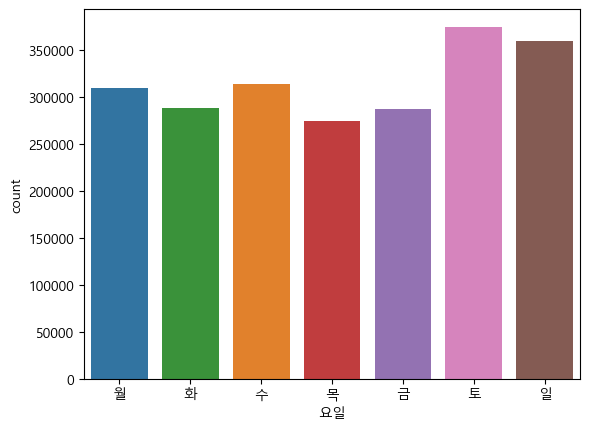

In [17]:
sns.countplot(x='요일', data=bikes, order=['월', '화', '수', '목', '금', '토', '일'], hue='요일')

<Axes: xlabel='일자', ylabel='count'>

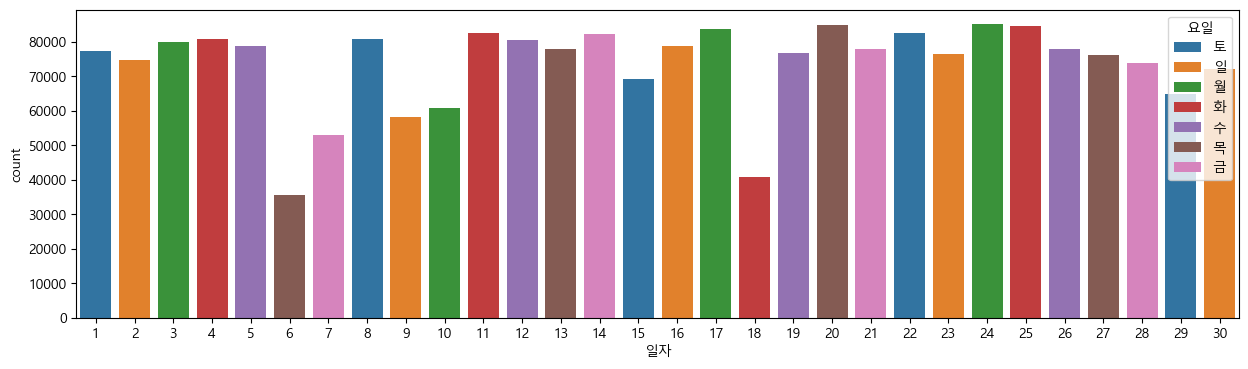

In [18]:
plt.figure(figsize=(15, 4))
sns.countplot(x='일자', data=bikes, hue='요일')

<Axes: xlabel='대여시간대', ylabel='count'>

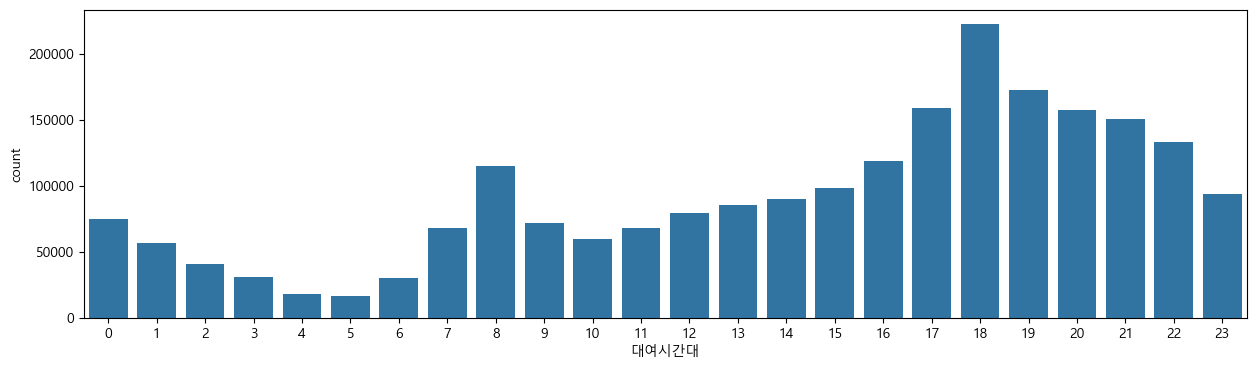

In [19]:
plt.figure(figsize=(15, 4))
sns.countplot(x='대여시간대', data=bikes)

In [20]:
bikes.head(100)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간   이용거리  \
0   SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27   1330   
1   SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54   1180   
2   SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12   1930   
3   SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6   1340   
4   SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5   1230   
..        ...                 ...       ...                ...   ...    ...   
95  SPB-19982 2019-06-02 19:00:00       101        (구)합정동 주민센터    93  12290   
96  SPB-16531 2019-06-02 20:04:00       800             목월공원 앞    48   6960   
97  SPB-11515 2019-06-02 20:57:00       106         합정역 7번출구 앞     5    610   
98  SPB-04435 2019-06-02 21:04:00       113       홍대입구역 2번출구 앞    10   2320   
99  SPB-19804 2019-06-02 21:27:00       103         망원역 2번출구 앞     8   6430   

    일자  요일번호 요일  대여시간대 주말구분   대여구      대여점위도       대여점경도  
0    3     0  월      8   평일  동대문구  37.561867  127.064377  
1    3     0  월      8   평일   성동구  37.563511  127.056725  
2    5     2  수      8   평일  동대문구  37.561867  127.064377  
3    5     2  수      8   평일  동대문구  37.561867  127.064377  
4   10     0  월      8   평일   성동구  37.561371  127.063660  
..  ..   ... ..    ...  ...   ...        ...         ...  
95   2     6  일     19   주말   마포구  37.549561  126.905754  
96   2     6  일     20   주말   용산구  37.532433  126.954742  
97   2     6  일     20   주말   마포구  37.548645  126.912827  
98   2     6  일     21   주말   마포구  37.557499  126.923805  
99   2     6  일     21   주말   마포구  37.554951  126.910835  

[100 rows x 14 columns]

In [21]:
hourly_dayofweek_ride = bikes.pivot_table(index='대여시간대', columns='요일', values='자전거번호', aggfunc='count')
hourly_dayofweek_ride

요일         금      목      수      월      일      토      화
대여시간대                                                 
0       8353   9568   8624   7461  17025  13438   9907
1       6748   7508   7226   4846  11731  11232   7529
2       4762   5857   5328   3305   8804   8348   4497
3       3045   3992   3430   2102   8748   6221   3157
4       1979   2402   2160   1544   4076   3584   1971
5       2070   2451   2495   2069   2567   2619   2316
6       4252   4534   5393   4455   3311   3345   4633
7      10337  11324  13853  11418   4420   4869  12070
8      17164  17818  23542  18762   6651   8696  22119
9       8901  10833  11515  10017   8530  10357  11369
10      6232   8164   8006   7384  10215  11377   7924
11      7022   9269   9241   8400  11974  13452   8787
12      8257  10597  10124   9848  14728  15822  10035
13      9585  11024  10269   9868  17102  17854   9984
14     10792  10747  10523  10182  18937  19218   9659
15     12168   9543  11846  11495  21866  21775   9248
16     15522  12278  14861  14450  24692  24452  12638
17     22978  17855  21181  22498  26392  27365  20799
18     32900  28806  34606  38635  27452  25958  33922
19     22261  19608  24924  28746  28142  26883  22275
20     19684  17643  21835  25413  27068  27082  18615
21     19760  17189  21265  23303  23656  27143  17910
22     19201  15077  19240  20211  18648  24407  16319
23     13083  10678  12568  13174  13367  19539  11017

<Axes: title={'center': '대여시간대 x 요일 이용건수'}, xlabel='대여시간대'>

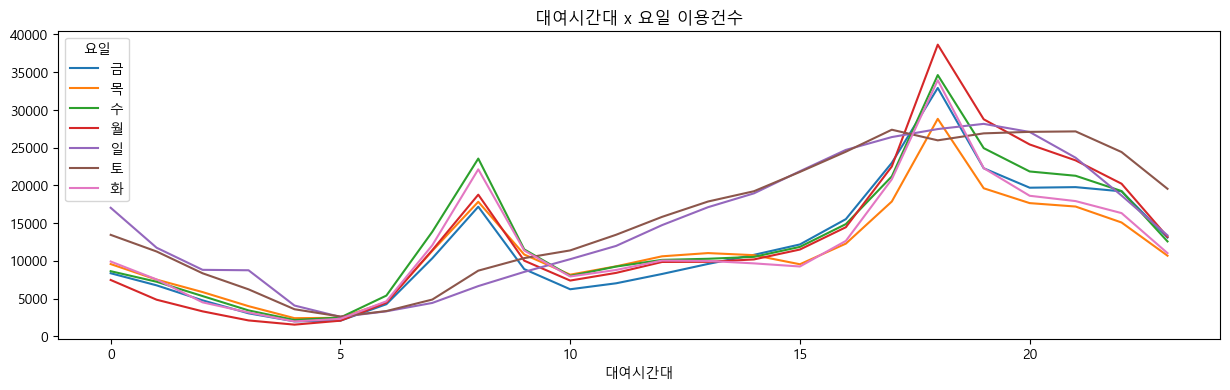

In [22]:
hourly_dayofweek_ride.plot(kind='line', title = '대여시간대 x 요일 이용건수', figsize=(15,4))

<Axes: title={'center': '대여시간대 x 요일 이용건수'}, xlabel='대여시간대'>

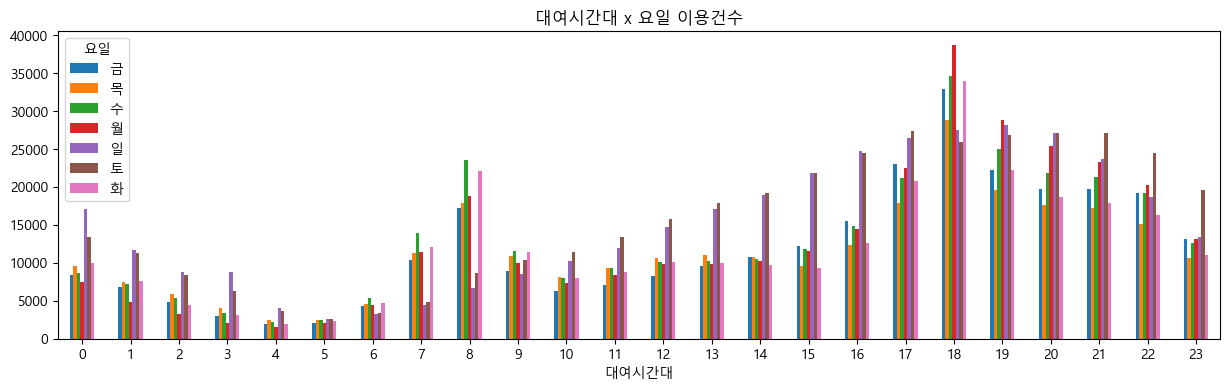

In [23]:
hourly_dayofweek_ride.plot(kind='bar', title='대여시간대 x 요일 이용건수', figsize=(15, 4), rot=0)

<Axes: xlabel='대여시간대', ylabel='count'>

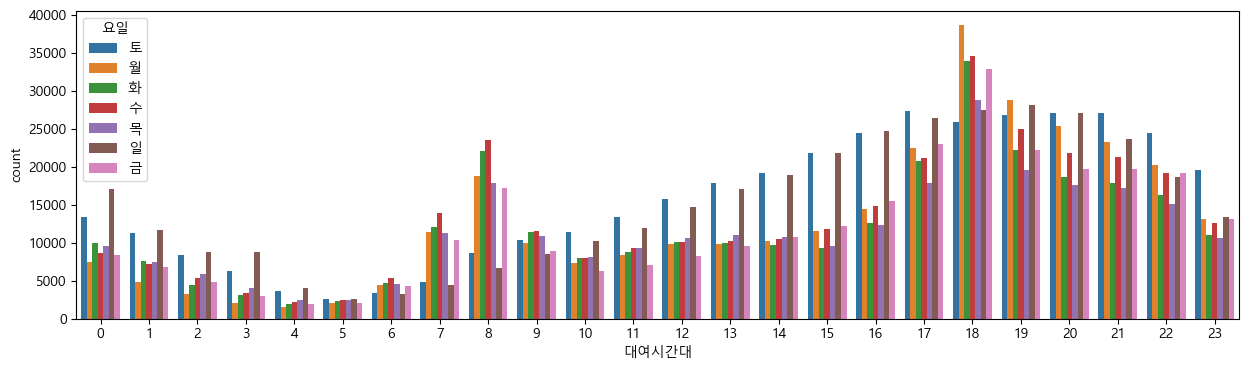

In [24]:
plt.figure(figsize=(15, 4))
sns.countplot(data=bikes, x='대여시간대', hue='요일')

<Axes: xlabel='요일', ylabel='대여시간대'>

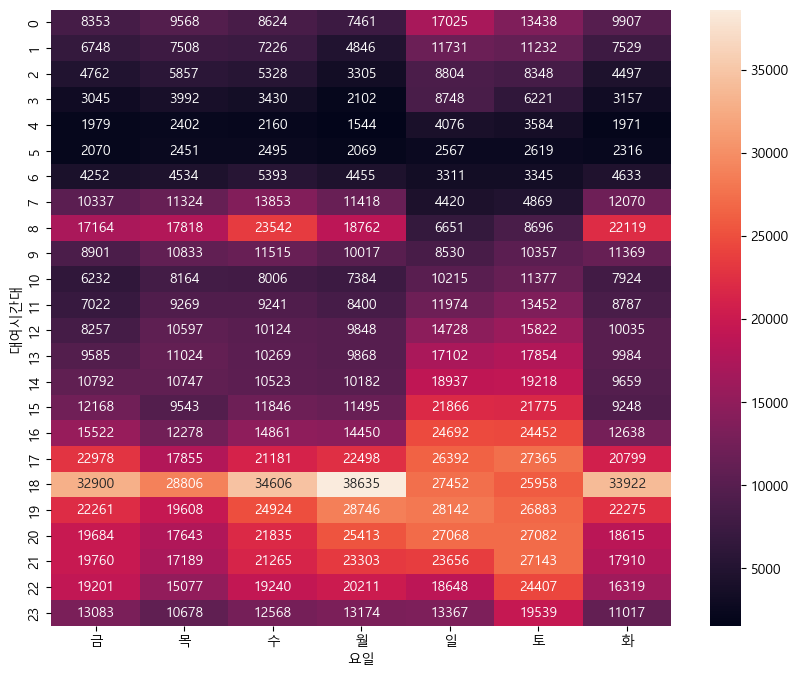

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=hourly_dayofweek_ride, annot=True, fmt='d')

In [26]:
weekdays_hourly_ride = bikes.pivot_table(
    index='대여시간대',
    columns='주말구분',
    values='자전거번호',
    aggfunc='count')
weekdays_hourly_ride

주말구분      주말      평일
대여시간대               
0      30463   43913
1      22963   33857
2      17152   23749
3      14969   15726
4       7660   10056
5       5186   11401
6       6656   23267
7       9289   59002
8      15347   99405
9      18887   52635
10     21592   37710
11     25426   42719
12     30550   48861
13     34956   50730
14     38155   51903
15     43641   54300
16     49144   69749
17     53757  105311
18     53410  168869
19     55025  117814
20     54150  103190
21     50799   99427
22     43055   90048
23     32906   60520

<Axes: xlabel='대여시간대'>

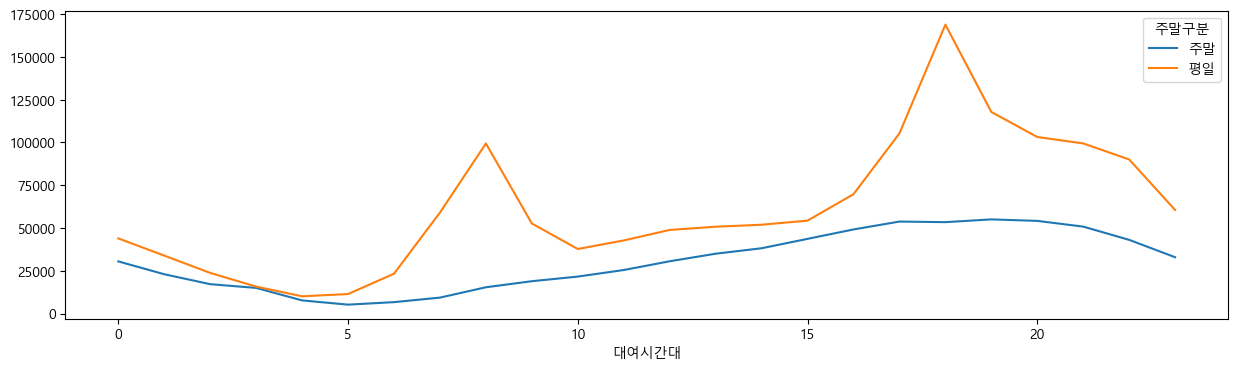

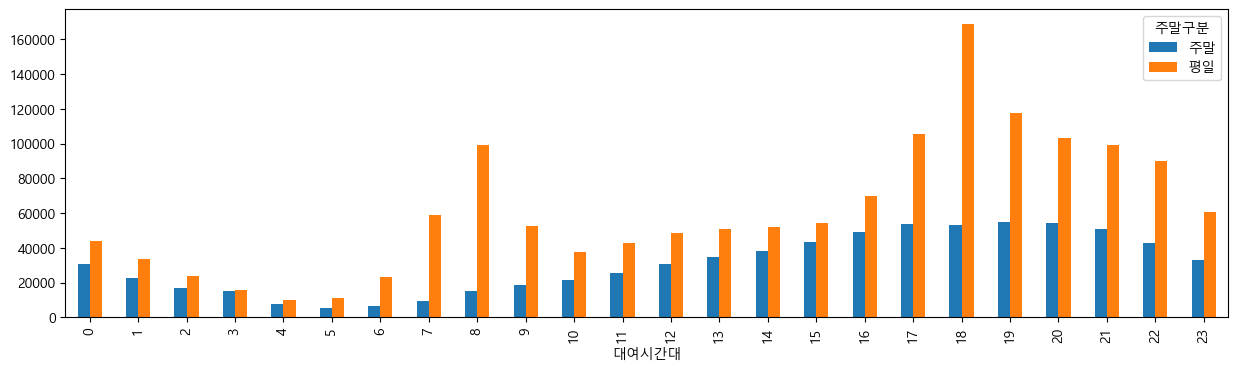

In [27]:
weekdays_hourly_ride.plot(kind='line', figsize = (15, 4))
weekdays_hourly_ride.plot(kind='bar', figsize = (15, 4))

<Axes: xlabel='주말구분', ylabel='대여시간대'>

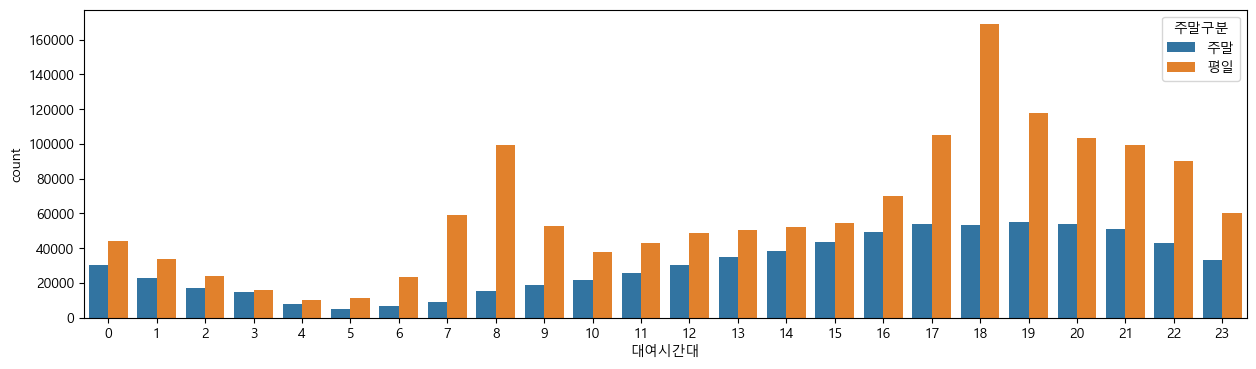

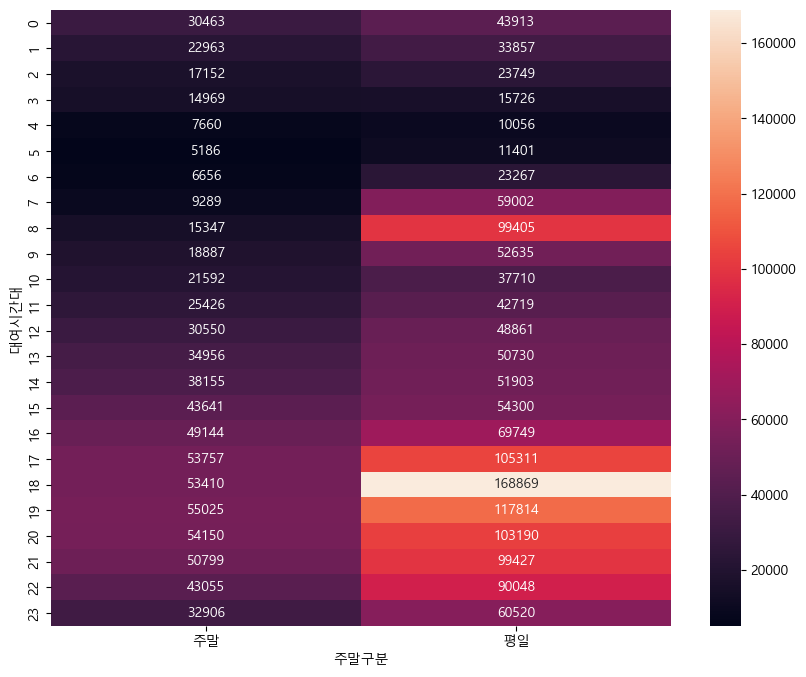

In [29]:
plt.figure(figsize=(15, 4))
sns.countplot(x='대여시간대', hue='주말구분', data=bikes)

plt.figure(figsize=(10, 8))
sns.heatmap(data=weekdays_hourly_ride, annot=True, fmt='d')